In [2]:
import pandas as pd
import xml.etree.ElementTree as ET

from astropy.io.votable import parse
from astropy.io.votable import parse_single_table
from astropy.io.votable.tree import VOTableFile, Resource, Table, Field



In [3]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'

# science plot

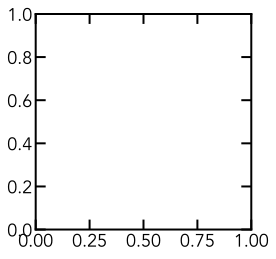

In [4]:
import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]


# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', 2)



# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


# Hide the top and right spines of the axis
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


table['obs_title']

# CygX-3

## CygX-3 mwa 10degree

In [ ]:
path = '/Users/brettlv/Downloads/mwa_paper/mwa_cover/Cyg X-3_10degree.xml'
votable = parse(path)
table = parse_single_table(path).to_table()

/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


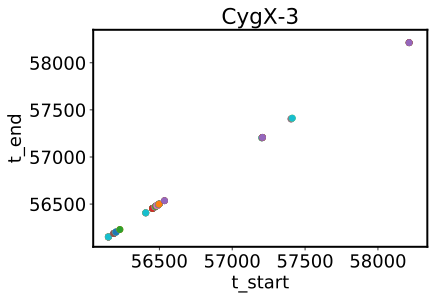

In [8]:

for i,j in zip(table[table.colnames[10]],table[table.colnames[11]]):
    plt.scatter(i,j)
plt.xlabel('t_start')
plt.ylabel('t_end')
plt.title('CygX-3')
plt.savefig('/Users/brettlv/Downloads/mwa_paper/mwa_cover/Cyg X-3_10degree.png')

In [5]:
from astropy.io import fits
import pyfits


## CygX-3 Fermi 

In [59]:
ls /Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/

CygnusX-3_604800.lc  CygnusX-3_86400.lc


In [6]:
gamma_week_path='/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/CygnusX-3_604800.lc'
gamma_day_path='/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/CygnusX-3_86400.lc'
lightcurve_day=pyfits.open(gamma_day_path)

In [7]:
lightcurve_day[0]

In [8]:
lightcurve_day.info()

Filename: /Users/brettlv/Downloads/CygX-3/CygnusX-3_86400.lc
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    LIGHTCURVES  BinTableHDU    978   1284R x 16C   [D, D, 10A, E, E, E, E, L, E, E, L, E, E, L, E, E]   


In [9]:
lightcurve_day[1].header['MJDREFI']

51910.0

In [10]:
lightcurve_day[1].header['MJDREFF']

'7.428703703703703D-4'

In [11]:
time_day=lightcurve_day[1].data['START']
count_day=lightcurve_day[1].data['FLUX_100_300000']
counterr_day=lightcurve_day[1].data['ERROR_100_300000']
during_day=lightcurve_day[1].data['DURATION']
t_day=time_day/86400+lightcurve_day[1].header['MJDREFI']+7.428703703703703e-4

## Cyg X-3_30degree

### write table timeselect

In [70]:
table.write?

In [71]:
time_left,timeright=(58000,58400)
table1=table[table['t_min']>time_left]
table2=table1[table1['t_min']<timeright]
table2.write('/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/CygX-3_%s_%s.csv'%(time_left,timeright),format='csv',overwrite=True)




In [72]:
time_left,timeright=(58180,58300)
table1=table[table['t_min']>time_left]
table2=table1[table1['t_min']<timeright]
table2.write('/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/CygX-3_%s_%s.csv'%(time_left,timeright),format='csv',overwrite=True)

In [80]:
table_G0034=table2[table2['obs_publisher_did']==b'G0034']

In [82]:
table_G0034

obs_id,access_url,obs_title,obs_publisher_did,obs_collection,obs_creator_did,access_estsize,s_ra,s_dec,s_fov,t_min,t_max,t_exptime,em_min,em_max
object,object,object,object,object,object,int64,float64,float64,float64,float64,float64,float32,float64,float64
1205016656,,shadowaskap,G0034,Shadowing Parkes FRB observations,shadowaskap,83367524160,299.857,13.664,40.0,58190.951852,58190.953519,144.0,1.760999,1.501364
1205017720,,shadowaskap,G0034,Shadowing Parkes FRB observations,shadowaskap,174772494720,297.537,21.244,42.0,58190.964167,58190.967593,296.0,1.760999,1.501364
1205018016,,shadowaskap,G0034,Shadowing Parkes FRB observations,shadowaskap,63343719360,298.774,21.242,42.0,58190.967593,58190.968889,112.0,1.760999,1.501364
1205018136,,shadowaskap,G0034,Shadowing Parkes FRB observations,shadowaskap,173557134720,299.275,21.241,42.0,58190.968981,58190.972407,296.0,1.760999,1.501364
1205018432,,shadowaskap,G0034,Shadowing Parkes FRB observations,shadowaskap,53499072960,300.511,21.239,42.0,58190.972407,58190.973519,96.0,1.760999,1.501364
1205018544,,shadowaskap,G0034,Shadowing Parkes FRB observations,shadowaskap,174690964800,294.612,30.921,49.0,58190.973704,58190.97713,296.0,1.760999,1.501364
1205018840,,shadowaskap,G0034,Shadowing Parkes FRB observations,shadowaskap,64659058560,295.848,30.919,49.0,58190.97713,58190.978426,112.0,1.760999,1.501364
1206665568,,shadowaskap,G0034,Shadowing Parkes FRB observations,shadowaskap,174522121920,297.487,21.244,42.0,58210.036481,58210.039907,296.0,1.760999,1.501364
1206665864,,shadowaskap,G0034,Shadowing Parkes FRB observations,shadowaskap,176955477120,289.971,23.694,45.0,58210.039907,58210.043333,296.0,1.760999,1.501364


In [85]:
with open('/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/CygX-3_G0034.txt','w+') as f:
    for i in table_G0034['obs_id']:
        f.write(i.decode('utf-8')+'\n')

In [86]:
more /Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3/CygX-3_G0034.txt

In [ ]:
b'GLEAM'
b'Detecting Molecular Lines with the MWA'
b'Searching for SGR 1935+2154 in radio'
b'Instrument Verification Program'
b'Meridian Snapshot Survey'
b'IPS'
b'Searching for pulsars in the image domain: pilot study'
b'Shadowing Parkes FRB observations'
b'All-sky scan test'

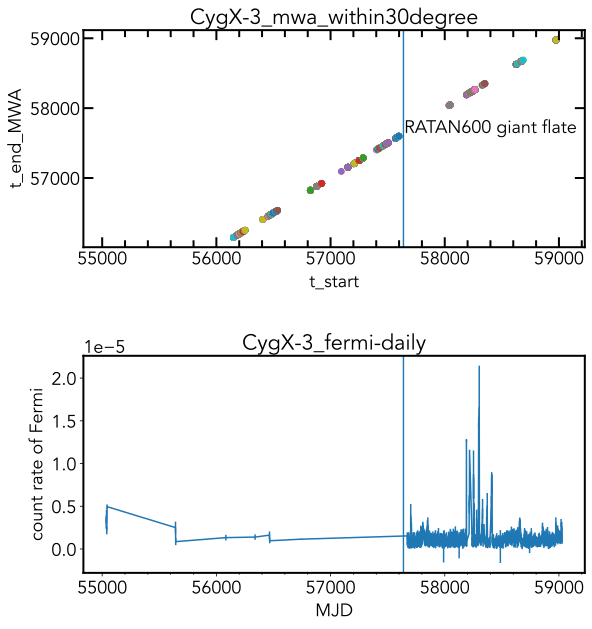

In [16]:
path = '/Users/brettlv/Downloads/mwa_paper/mwa_cover/Cyg X-3_30degree.xml'
votable = parse(path)
table = parse_single_table(path).to_table()
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(9, 10))
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(211)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(200))
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')



for i,j in zip(table[table.colnames[10]],table[table.colnames[11]]):
    ax.scatter(i,j)
    
ax2=fig.add_subplot(212,sharex=ax)    
ax2.errorbar(t_day,count_day,counterr_day)    
    
ax.set_xlabel('t_start')
ax.set_ylabel('t_end_MWA')

ax2.set_xlabel('MJD')
ax2.set_ylabel('count rate of Fermi')

#ax.axvline(57644.5)
#ax2.axvline(57644.5)
ax.axvspan(57632,57644.5)
ax2.axvspan(57632,57644.5)
ax.text(57644.5,57645,'RATAN600 giant flate')
ax2.set_title('CygX-3_fermi-daily') 
ax.set_title('CygX-3_mwa_within30degree')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('/Users/brettlv/Downloads/mwa_paper/mwa_cover/Cyg X-3_30degree.png')

## time_select

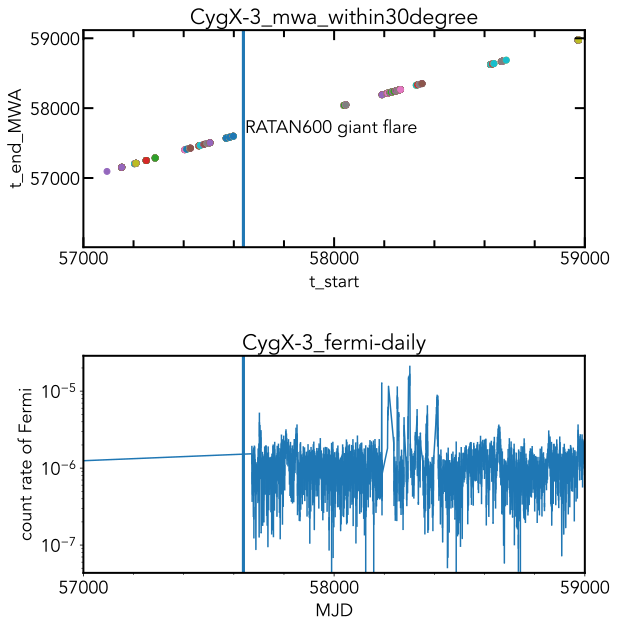

In [61]:
path = '/Users/brettlv/Downloads/mwa_paper/mwa_cover/Cyg X-3_30degree.xml'
votable = parse(path)
table = parse_single_table(path).to_table()
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(9, 10))
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(211)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(200))
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')



for i,j in zip(table[table.colnames[10]],table[table.colnames[11]]):
    ax.scatter(i,j)
    
ax2=fig.add_subplot(212,sharex=ax)    
ax2.errorbar(t_day,count_day,counterr_day)    
    
ax.set_xlabel('t_start')
ax.set_ylabel('t_end_MWA')

ax2.set_xlabel('MJD')
ax2.set_ylabel('count rate of Fermi')
ax2.semilogy()

time_left,timeright=(57000,59000)
ax.set_xlim(time_left,timeright)
#ax.axvline(57644.5)
#ax2.axvline(57644.5)
ax.axvspan(57632,57644.5)
ax2.axvspan(57632,57644.5)



ax.text(57644.5,57645,'RATAN600 giant flare')
ax.set_title('CygX-3_mwa_within30degree') 
ax2.set_title('CygX-3_fermi-daily') 
plt.subplots_adjust(hspace = 0.5)
plt.savefig('/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3_30degree_%s-%s.png'%(time_left,timeright))

### 58000,58400

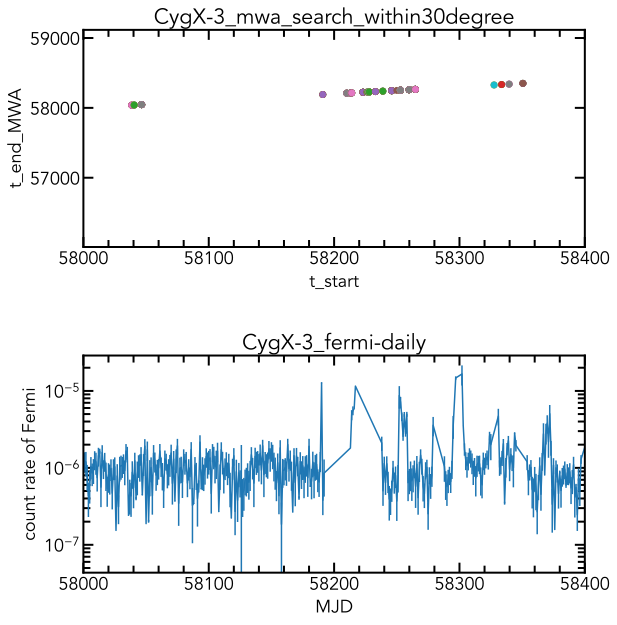

In [62]:
path = '/Users/brettlv/Downloads/mwa_paper/mwa_cover/Cyg X-3_30degree.xml'
votable = parse(path)
table = parse_single_table(path).to_table()
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(9, 10))
# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(211)




for i,j in zip(table[table.colnames[10]],table[table.colnames[11]]):
    ax.scatter(i,j)
    
ax2=fig.add_subplot(212,sharex=ax)    
ax2.errorbar(t_day,count_day,counterr_day)    
    
ax.set_xlabel('t_start')
ax.set_ylabel('t_end_MWA')

ax2.set_xlabel('MJD')
ax2.set_ylabel('count rate of Fermi')
ax2.semilogy()

time_left,timeright=(58000,58400)
ax.set_xlim(time_left,timeright)
#ax.axvline(57644.5)
#ax2.axvline(57644.5)
ax.axvspan(57632,57644.5)
ax2.axvspan(57632,57644.5)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(20))
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


#ax.text(57644.5,57645,'RATAN600 giant flate')
ax.set_title('CygX-3_mwa_search_within30degree') 
ax2.set_title('CygX-3_fermi-daily') 
plt.subplots_adjust(hspace = 0.5)
plt.savefig('/Users/brettlv/Downloads/mwa_paper/mwa_cover/CygX-3_30degree_%s-%s.png'%(time_left,timeright))

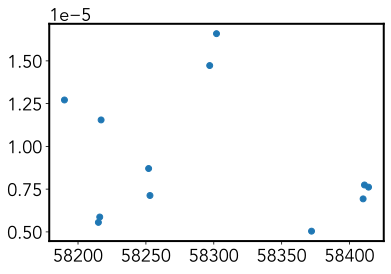

In [51]:
plt.scatter(t_day[count_day>0.5e-5],count_day[count_day>0.5e-5])

In [49]:
t_day[count_day>0.5e-5]

array([58190.00074287, 58215.00074287, 58216.00074287, 58217.00074287,
       58252.00074287, 58253.00074287, 58297.00074287, 58302.00074287,
       58372.00074287, 58410.00074287, 58411.00074287, 58414.00074287])

In [50]:
count_day[count_day>0.5e-5]

array([1.27134972e-05, 5.55634506e-06, 5.87026580e-06, 1.15468656e-05,
       8.70622171e-06, 7.12851852e-06, 1.47268765e-05, 1.65911551e-05,
       5.04310628e-06, 6.93149468e-06, 7.74370710e-06, 7.61740876e-06],
      dtype=float32)

## time convert

In [53]:
from datetime import timedelta, datetime
from astropy.time import Time
def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()

In [60]:
convert_xaxis_mjd('2015-12-13')

57369.0

In [55]:
time_left,timeright=(58180,58300)
table1=table[table['t_min']>time_left]
table2=table1[table1['t_min']<timeright]

table2.colnames

In [57]:
for i in table2['t_min']:
    date_i=convert_xaxis_time(i)
    print(date_i)

2018-03-13 22:50:40.012800
2018-03-13 23:08:24.028800
2018-03-13 23:13:20.035200
2018-03-13 23:15:19.958400
2018-03-13 23:20:15.964800
2018-03-13 23:22:08.025600
2018-03-13 23:27:04.032000
2018-04-02 00:52:31.958400
2018-04-02 00:57:27.964800
2018-04-02 01:02:23.971200
2018-04-02 01:07:19.977600
2018-04-02 01:12:15.984000
2018-04-02 01:17:11.990400
2018-04-02 01:22:07.996800
2018-04-02 01:27:04.003200
2018-04-02 01:32:00.009600
2018-04-02 01:36:56.016000
2018-04-02 01:41:52.022400
2018-04-02 01:46:48.028800
2018-04-02 01:51:44.035200
2018-04-05 03:00:40.003200
2018-04-05 03:05:36.009600
2018-04-05 03:10:32.016000
2018-04-05 03:15:28.022400
2018-04-05 03:20:24.028800
2018-04-05 03:25:20.035200
2018-04-05 03:30:16.041600
2018-04-05 03:35:11.961600
2018-04-05 03:40:07.968000
2018-04-05 03:45:03.974400
2018-04-06 00:51:52.041600
2018-04-06 00:56:47.961600
2018-04-06 01:01:43.968000
2018-04-06 01:06:39.974400
2018-04-06 01:11:35.980800
2018-04-06 01:16:31.987200
2018-04-06 01:21:27.993600
2

In [54]:
for i in t_day[count_day>0.5e-5]:
    date_i=convert_xaxis_time(i)
    print(date_i)

2018-03-13 00:01:04.184000
2018-04-07 00:01:04.184000
2018-04-08 00:01:04.184000
2018-04-09 00:01:04.184000
2018-05-14 00:01:04.184000
2018-05-15 00:01:04.184000
2018-06-28 00:01:04.184000
2018-07-03 00:01:04.184000
2018-09-11 00:01:04.184000
2018-10-19 00:01:04.184000
2018-10-20 00:01:04.184000
2018-10-23 00:01:04.184000
